In [1]:
# %pip install svo_filters

In [99]:
from svo_filters import svo
from astropy import units as u
import matplotlib.pyplot as plt
import numpy as np

# Tranmission Curves 


## Overview
Transmission curves of telescope filters are graphical representations that show how much light a filter allows to pass through at different wavelengths. These curves are crucial for astronomers and astrophotographers, as they help in understanding the filter's performance and its suitability for various observational purposes. Here's a detailed explanation:

1. **Definition**: A transmission curve is essentially a graph where the x-axis represents the wavelength of light (usually in nanometers or angstroms) and the y-axis represents the percentage of light transmitted at each wavelength.

2. **Types of Filters**:
   - **Broadband Filters**: These filters allow a wide range of wavelengths to pass through. Their transmission curves show a broad peak or several peaks across a wide wavelength range.
   - **Narrowband Filters**: These are designed to transmit a very narrow range of wavelengths. The transmission curves for narrowband filters show sharp, narrow peaks. They are often used in astrophotography to isolate specific wavelengths emitted by astronomical objects.
   - **Line Filters**: These are a type of narrowband filter that specifically target certain spectral lines, like the Hydrogen-alpha line. Their transmission curves have very sharp and narrow peaks at the specific wavelengths of interest.

3. **Importance**:
   - **Selective Imaging**: Filters are used to isolate certain wavelengths to enhance specific features of celestial objects.
   - **Reducing Sky Glow and Light Pollution**: Some filters are designed to block wavelengths associated with common sources of light pollution, improving the contrast of astronomical images.
   - **Atmospheric Correction**: Filters can also be used to reduce the effects of atmospheric interference.

4. **Interpreting Transmission Curves**:
   - **Peak Transmission**: The height of the peak in the curve indicates how much light is transmitted at that wavelength.
   - **Bandwidth**: The width of the curve at its peak shows the range of wavelengths the filter allows.
   - **Cutoff Characteristics**: Steep sides on a curve indicate a sharp cutoff, which is desirable for isolating specific wavelengths.

Transmission curves are essential for matching filters to the specific needs of an observational or imaging project, ensuring that the right wavelengths are being captured while unwanted light is effectively blocked out.

---

Viewing all filters

In [4]:
svo.filters()

['2MASS.H',
 '2MASS.J',
 '2MASS.Ks',
 'ACS_HRC.F435W',
 'ACS_HRC.F555W',
 'ACS_HRC.F658N',
 'ACS_HRC.F775W',
 'ACS_HRC.F850LP',
 'Cousins.I',
 'Cousins.R',
 'FourStar.J',
 'FourStar.J1',
 'FourStar.J2',
 'FourStar.J3',
 'Gaia.bp',
 'Gaia.G',
 'Gaia.rp',
 'GALEX.FUV',
 'GALEX.NUV',
 'HAWK_I.H',
 'HAWK_I.J',
 'HAWK_I.Ks',
 'IRAC.I1',
 'IRAC.I2',
 'IRAC.I3',
 'IRAC.I4',
 'Johnson.V',
 'Kepler.K',
 'MIRI.F1000W',
 'MIRI.F1130W',
 'MIRI.F1280W',
 'MIRI.F1500W',
 'MIRI.F1800W',
 'MIRI.F2100W',
 'MIRI.F2550W',
 'MIRI.F560W',
 'MIRI.F770W',
 'NICMOS3.F110W',
 'NICMOS3.F160W',
 'NIRCam.F070W',
 'NIRCam.F090W',
 'NIRCam.F115W',
 'NIRCam.F140M',
 'NIRCam.F150W',
 'NIRCam.F150W2',
 'NIRCam.F162M',
 'NIRCam.F164N',
 'NIRCam.F182M',
 'NIRCam.F187N',
 'NIRCam.F200W',
 'NIRCam.F210M',
 'NIRCam.F212N',
 'NIRCam.F250M',
 'NIRCam.F277W',
 'NIRCam.F300M',
 'NIRCam.F322W2',
 'NIRCam.F323N',
 'NIRCam.F335M',
 'NIRCam.F356W',
 'NIRCam.F360M',
 'NIRCam.F405N',
 'NIRCam.F410M',
 'NIRCam.F430M',
 'NIRCam.F444W'

How many filters?

In [6]:
len(svo.filters())

114

That's a lot of filters. I want to find `Johnson V` filter

In [14]:
all_filters = svo.filters()
name = 'V'
[tfilter for tfilter in all_filters if name in tfilter]

['GALEX.FUV',
 'GALEX.NUV',
 'Johnson.V',
 'WFC3_UVIS2.F814W',
 'WFC3_UVIS2.F850LP']

In [15]:
# Now I know Johnson.V is the filtername

filter = svo.Filter('Johnson.V')
filter?

Type:           Filter
String form:    <svo_filters.svo.Filter object at 0x000001F2A383E240>
File:           c:\sangeetha\personalprojects\photometry\.conda\lib\site-packages\svo_filters\svo.py
Docstring:     
Creates a Filter object to store a photometric filter profile
and metadata

Attributes
----------
path: str
    The absolute filepath for the bandpass data, an ASCII file with
    a wavelength column in Angstroms and a response column of values
    ranging from 0 to 1
refs: list, str
    The references for the bandpass data
rsr: np.ndarray
    The wavelength and relative spectral response (RSR) arrays
Band: str
    The band name
CalibrationReference: str
    The paper detailing the calibration
FWHM: float
    The FWHM for the filter
Facility: str
    The telescope facility
FilterProfileService: str
    The SVO source
MagSys: str
    The magnitude system
PhotCalID: str
    The calibration standard
PhotSystem: str
    The photometric system
ProfileReference: str
    The SVO referen

In [21]:
filter.info()

     Attributes                                                     Values                                               
-------------------- ----------------------------------------------------------------------------------------------------
            Comments />                                                                                                  
FilterProfileService ivo://svo/fps                                                                                       
              MagSys Vega                                                                                                
           PhotCalID Generic/Johnson.V/Vega                                                                              
          PhotSystem Johnson                                                                                             
       WavelengthUCD em.wl                                                                                               
       ZeroPointType Pog

In [20]:
# FWHM value
filter.fwhm

<Quantity 0.08767 um>

In [22]:
filter.plot()

Filter in Angstorm

In [27]:
filter = svo.Filter('MIRI.F1000W', wave_units=u.Angstrom)
filter.plot()

Plot Kepler transmission curve

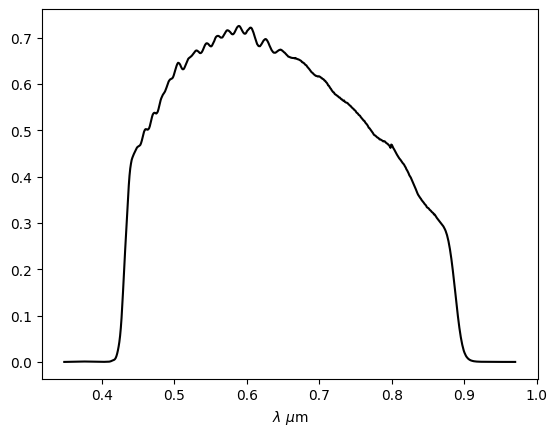

In [46]:
filter = svo.Filter("Kepler.K")
throughput = filter.throughput[0]
wavelengths = filter.wave[0].value
plt.plot(wavelengths, throughput, color='k')   
plt.xlabel(r'$\lambda$ $\mu$m');

Plot transmission curves of all the MIRI filters

In [50]:
all_filters = svo.filters()
name = 'MIRI'
miri_filters = [tfilter for tfilter in all_filters if name in tfilter]

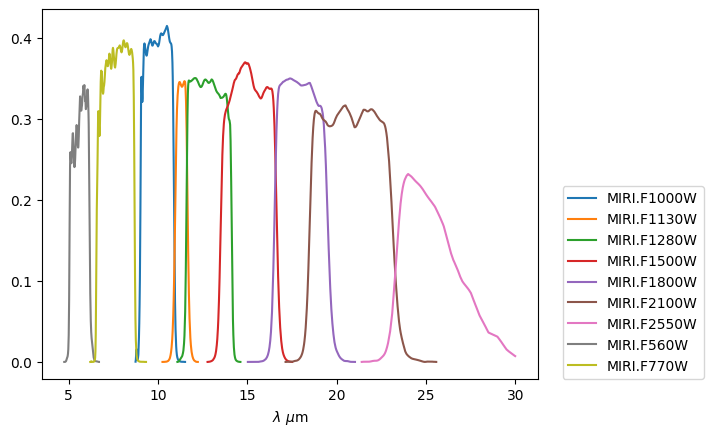

In [55]:
for miri_filter in miri_filters:
    filter = svo.Filter(miri_filter)
    throughput = filter.throughput[0]
    wavelengths = filter.wave[0].value
    plt.plot(wavelengths, throughput, label=miri_filter)   
    plt.xlabel(r'$\lambda$ $\mu$m')
plt.legend(loc=(1.05,0));

I want to plot TESS filter

In [56]:
all_filters = svo.filters()
name = 'TESS'
[tfilter for tfilter in all_filters if name in tfilter]

[]

Oh no! There are no TESS filters. 

I downloaded TESS filter from [SVO Filter Profile website](http://svo2.cab.inta-csic.es/theory/fps/) and placed it in the `data/filters` directory of `svo_filter` package

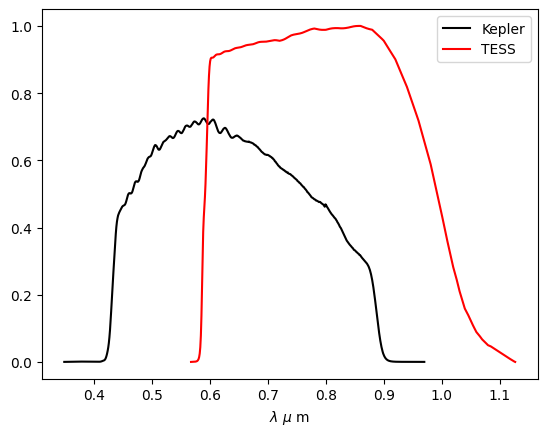

In [98]:
tess = svo.Filter(band='TESS')
throughput_tess = tess.throughput[0]
wavelengths_tess = tess.wave[0].value

kepler = svo.Filter("Kepler.K")
throughput_kepler = kepler.throughput[0]
wavelengths_kepler = kepler.wave[0].value

plt.plot(wavelengths_kepler, throughput_kepler, color='k', label='Kepler')
plt.plot(wavelengths_tess, throughput_tess, color='r', label='TESS')   
plt.xlabel(r'$\lambda$ $\mu$ m')
plt.legend();

We can even apply these filters to spectrum to see what we get!

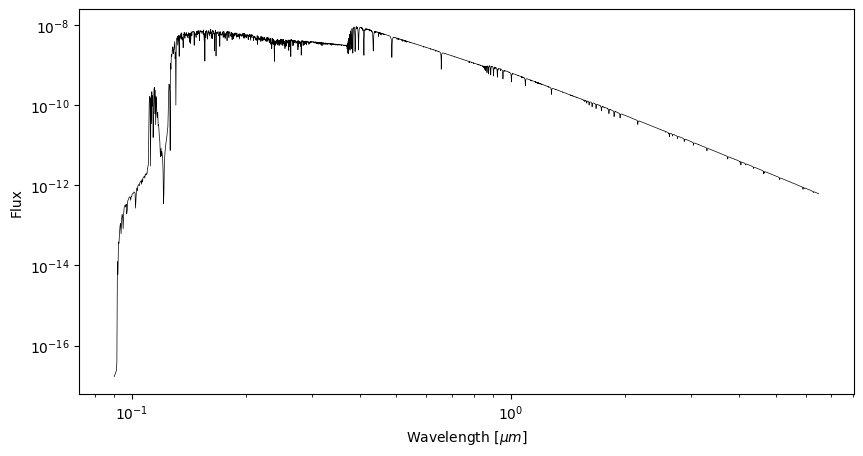

In [133]:
spec = np.genfromtxt("data/vega.txt")
wave_um, flux = spec.T[0], spec.T[1]
plt.figure(figsize=(10,5))
plt.plot(wave_um, flux, color='k', linewidth=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"Wavelength [$\mu m$]")
plt.ylabel("Flux");

Apply Kepler filter

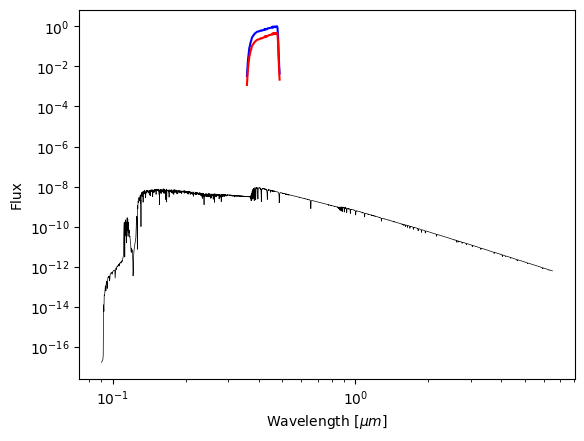

In [168]:
kepler = svo.Filter("ACS_HRC.F435W")

wavelengths_kepler = kepler.wave[0].value
throughput_kepler = kepler.throughput[0]
filtered_spec, e_filtered_spec = kepler.apply(spec)


plt.plot(wave_um, flux, color='k', linewidth=0.5)
plt.plot(wavelengths_kepler, throughput_kepler, color='b')
plt.plot(wavelengths_kepler, filtered_spec, color='r')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"Wavelength [$\mu m$]")
plt.ylabel("Flux");